In [47]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import pickle


from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping

RANDOM_STATE = 42

In [2]:
pd.set_option('display.max_columns', None)

In [71]:
df = pd.read_csv('train.csv')
df = df.drop(columns=['ID','arrival_date_year',
                        'arrival_date_month','reservation_status',
                        'reservation_status_date','agent','company'])
df['children']=df['children'].fillna(df['children'].median())
df['country']=df['country'].fillna(df['country'].value_counts().index[0])


In [72]:
le = LabelEncoder()
categorical_features = list(df.columns[df.dtypes == object])
df[categorical_features]=df[categorical_features].apply(lambda x: le.fit_transform(x))
df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,342,27,1,0,0,2,0.0,0,0,124,3,1,0,0,0,2,2,3,0,0,2,-6.305161,0,0
1,0,0,257,27,1,0,2,1,0.0,0,2,124,5,3,0,0,0,0,0,1,0,0,2,75.052227,0,0
2,0,0,257,27,1,0,2,2,0.0,0,2,124,5,3,0,0,0,0,0,0,0,0,2,74.546401,0,0
3,0,0,257,27,1,0,2,2,0.0,0,2,124,5,3,0,0,0,0,0,0,0,0,2,76.376288,0,0
4,0,0,257,27,1,0,2,2,0.0,0,2,124,5,3,0,0,0,0,0,0,0,0,2,49.411647,0,0


In [73]:
can_df = df.drop(columns=['adr'])
adr_df = df
can_df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,1,0,342,27,1,0,0,2,0.0,0,0,124,3,1,0,0,0,2,2,3,0,0,2,0,0
1,0,0,257,27,1,0,2,1,0.0,0,2,124,5,3,0,0,0,0,0,1,0,0,2,0,0
2,0,0,257,27,1,0,2,2,0.0,0,2,124,5,3,0,0,0,0,0,0,0,0,2,0,0
3,0,0,257,27,1,0,2,2,0.0,0,2,124,5,3,0,0,0,0,0,0,0,0,2,0,0
4,0,0,257,27,1,0,2,2,0.0,0,2,124,5,3,0,0,0,0,0,0,0,0,2,0,0


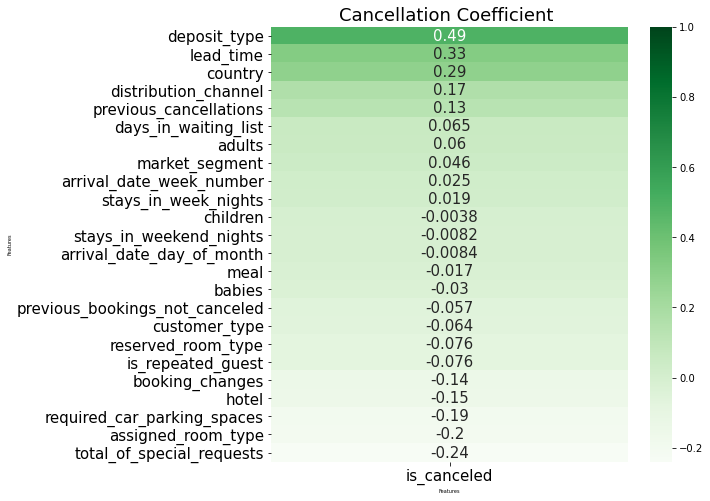

In [76]:
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(can_df.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, annot_kws = {"size":15}, cmap='Greens')
ax.set_title('Cancellation Coefficient ', fontsize=18)
ax.set_xlabel('Features', fontsize = 5)
ax.set_ylabel('Features', fontsize = 5)
ax.tick_params(axis = "both", labelsize = 15);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

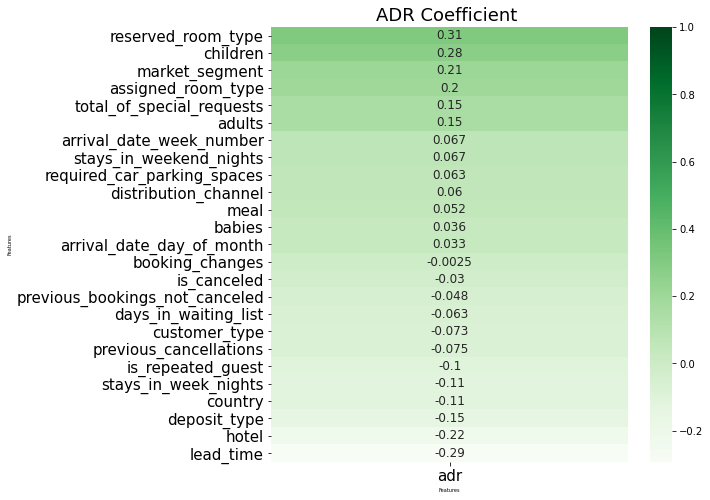

In [75]:
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(adr_df.corr()[['adr']].sort_values('adr', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Greens')
ax.set_title('ADR Coefficient ', fontsize=18)
ax.set_xlabel('Features', fontsize = 5)
ax.set_ylabel('Features', fontsize = 5)
ax.tick_params(axis = "both", labelsize = 15);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);